# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [277]:
import requests

In [278]:
url = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP"
response = requests.get(url)

In [279]:
data = response.json()
data

{'content': [],
 'displayArticles': [{'activityArticleNumber': '750994',
   'additionalImages': [],
   'articleCode': '65743-D',
   'assortmentState': 'CURRENT',
   'availableSizeInfo': [{'sizeName': 'XS', 'stockSize': '003'},
    {'sizeName': 'S', 'stockSize': '004'},
    {'sizeName': 'M', 'stockSize': '005'},
    {'sizeName': 'L', 'stockSize': '006'},
    {'sizeName': 'XL', 'stockSize': '007'},
    {'sizeName': 'XXL', 'stockSize': '008'}],
   'availableSwatches': [{'articleCode': '65743-D',
     'castorArticleId': '0451456001',
     'colour': 'abc0ef',
     'fabricImageResource': '/fabric/2017/7232AAAF-1C35-4CA5-B671-B87C82B71B04.jpg',
     'fabricUrl': '//lp.hm.com/hmprod?set=source[/fabric/2017/7232AAAF-1C35-4CA5-B671-B87C82B71B04.jpg]&call=url[file:/mobile/v1/fabric/sprite]'}],
   'castorArticleNumber': '001',
   'castorProductNumber': '0451456',
   'colourDescription': 'Denim blue',
   'departments': [{'code': 'MEN',
     'name': 'NAVIGATION.LABEL.DEPARTMENT.MEN',
     'paths': [

In [280]:
#it's in div class_="product_list_item"

### What is the tag name and class name for the old price? The new price?

In [281]:
#It's in span tag, class "old-price".

### What is the tag name and class name for the link to the product page?

In [282]:
#it's in the "a href" tag.

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [283]:
#already did.
# this is an API so we use .keys()...

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [284]:
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [285]:
len(data["displayArticles"])

60

In [286]:
len(data["displayArticles"][0]['name'])

28

## URLs

### What is the URL for data about on-sale men's clothing?

In [287]:
#http://api.hm.com/v2/us/en/products/display?categories=sale%+++2Fmen+++&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP
#http://api.hm.com/v2/us/en/products/categories?path=sale/+++men+++&deviceType=DESKTOP

### What is the URL for data about on-sale women's clothing?

In [288]:
#http://api.hm.com/v2/us/en/products/display?categories=sale%+++2Fladies+++&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP
#http://api.hm.com/v2/us/en/products/categories?path=sale/+++ladies+++&deviceType=DESKTOP

### What is the URL for data about on-sale women's tops?

In [289]:
#http://api.hm.com/v2/us/en/products/display?categories=sale%+++2Fladies%2Ftops+++&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP
#http://api.hm.com/v2/us/en/products/categories?path=sale/+++ladies/tops+++&deviceType=DESKTOP

### What changes about the url based on what you're looking for?

In [290]:
#2Fladies&concealCategories=true
#2Fmen&concealCategories=true
#2Fladies%2Ftops&concealCategories=true

## Request on-sale women's tops.

### How many results do you get?

In [291]:
first_url ="http://api.hm.com/v2/us/en/products/categories?path=sale/ladies/tops&deviceType=DESKTOP"
response = requests.get(first_url)
data0 = response.json()
data0
len(data0['categories'])

5

# How many total results are there? How do you change the URL to get more?

In [292]:
url2="http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP"
response = requests.get(url2)
data2 = response.json()
data2
len(data2['displayArticles'])

60

In [293]:
#In the API we change the pagesize from 60 to whatever we want.

In [294]:
url3 = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=200&page=1&deviceType=DESKTOP"
response = requests.get(url3)
data3 = response.json()
data3
len(data3['displayArticles'])

200

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [295]:
url4 = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=500&page=1&deviceType=DESKTOP"
response = requests.get(url4)
data4 = response.json()
data4
len(data4['displayArticles'])

368

In [296]:
women_list = data4['displayArticles']
#women_list[0]

In [297]:
women_top= []
for item in women_list:
    current = {}
    (item['name'])
    (item['articleCode'])
    (item['priceInfo']['formattedOldPrice'])
    (item ['priceInfo']['formattedPrice'])
    (item['webUrl'])
    current['Name'] = item['name']
    current['Product code/number'] = item['articleCode']
    current['Old Price'] = item['priceInfo']['formattedOldPrice']
    current['Current Price'] = item['priceInfo']['formattedPrice']
    current['Link'] = item['webUrl']
    women_top.append(current)

print(women_top)    

[{'Name': 'Short-sleeved Top', 'Product code/number': '65274-B', 'Old Price': '$9.99', 'Current Price': '$6.99', 'Link': 'http://www.hm.com/us/product/65274?article=65274-B'}, {'Name': 'Short-sleeved Top', 'Product code/number': '65274-F', 'Old Price': '$9.99', 'Current Price': '$6.99', 'Link': 'http://www.hm.com/us/product/65274?article=65274-F'}, {'Name': 'Short-sleeved Top', 'Product code/number': '65274-A', 'Old Price': '$9.99', 'Current Price': '$6.99', 'Link': 'http://www.hm.com/us/product/65274?article=65274-A'}, {'Name': 'Short-sleeved Top', 'Product code/number': '65274-E', 'Old Price': '$9.99', 'Current Price': '$6.99', 'Link': 'http://www.hm.com/us/product/65274?article=65274-E'}, {'Name': 'Jersey Top', 'Product code/number': '60133-B', 'Old Price': '$12.99', 'Current Price': '$5', 'Link': 'http://www.hm.com/us/product/60133?article=60133-B'}, {'Name': 'Jersey Top', 'Product code/number': '60133-E', 'Old Price': '$12.99', 'Current Price': '$5', 'Link': 'http://www.hm.com/us/

In [298]:
#to create a csv file you need a list of dict.

import pandas as pd
%matplotlib inline

In [299]:
df = pd.DataFrame(women_top)
df.to_csv("women_top.csv" , index = False)

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [300]:
df.head(10)

,Current Price,Link,Name,Old Price,Product code/number
0,$6.99,http://www.hm.com/us/product/65274?article=652...,Short-sleeved Top,$9.99,65274-B
1,$6.99,http://www.hm.com/us/product/65274?article=652...,Short-sleeved Top,$9.99,65274-F
2,$6.99,http://www.hm.com/us/product/65274?article=652...,Short-sleeved Top,$9.99,65274-A
3,$6.99,http://www.hm.com/us/product/65274?article=652...,Short-sleeved Top,$9.99,65274-E
4,$5,http://www.hm.com/us/product/60133?article=601...,Jersey Top,$12.99,60133-B
5,$5,http://www.hm.com/us/product/60133?article=601...,Jersey Top,$12.99,60133-E
6,$5,http://www.hm.com/us/product/60133?article=601...,Jersey Top,$12.99,60133-F
7,$5.99,http://www.hm.com/us/product/68934?article=689...,Jersey Top,$12.99,68934-C
8,$7,http://www.hm.com/us/product/65300?article=653...,Crêped Camisole Top,$17.99,65300-A
9,$7,http://www.hm.com/us/product/65300?article=653...,Crêped Camisole Top,$17.99,65300-B


### Convert the prices to numbers, if you haven't already

In [301]:
df['Current Price'] = df['Current Price'].str.replace("$", "").astype(float)
df['Old Price'] = df['Old Price'].str.replace("$", "").astype(float)

### What is the average on-sale price of a women's top? Make a histogram, too, please.

In [302]:
import statistics
#df['Old Price'].mean()
df['Current Price'].value_counts()

9.99     104
7.99      57
12.99     46
14.99     41
5.99      37
17.99     20
19.99     17
6.99      15
7.00       6
24.99      4
4.99       4
3.99       4
29.99      3
5.00       3
2.99       2
20.00      2
10.00      1
4.00       1
34.99      1
Name: Current Price, dtype: int64

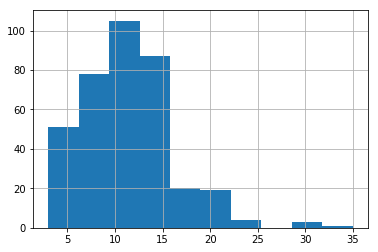

In [303]:
df['Current Price'].hist()

### What is the average discount between full price and on sale? Histogram too, please.

In [304]:
discount = df['Old Price']-df['Current Price']
discount.mean()

8.5291032608695652

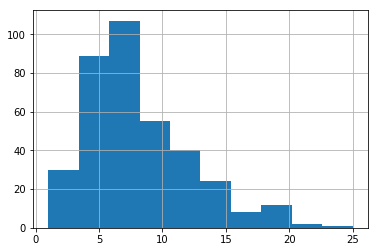

In [305]:
discount.hist()

### What is the average discount as a percentage of the full price? Histogram too, please.

In [306]:
sale_percentage = discount*100/df['Old Price']
sale_percentage.value_counts()

44.469150    45
33.355570    40
53.887606    27
48.019208    27
38.491147    25
40.016006    25
55.586437    19
46.697799    13
50.016672    13
27.793218    11
23.094688    11
42.869391     9
30.030030     8
40.013338     8
40.040040     8
28.011204     6
50.025013     6
46.189376     5
48.585310     5
61.089494     4
50.012503     4
20.008003     4
28.612303     4
40.008002     3
61.508853     3
28.579594     3
56.685562     3
60.040027     2
53.368913     2
33.388982     2
35.017509     2
53.302201     2
40.080160     2
20.040080     2
66.688896     2
62.515629     1
30.006001     1
55.013753     1
37.509377     1
62.875107     1
25.012506     1
44.289694     1
57.159188     1
47.935872     1
59.798995     1
49.987497     1
49.937422     1
13.342228     1
dtype: int64

## Shopping the sales

### How many items are over 50% off?


In [307]:
over_50 = sale_percentage > 50
over_50.value_counts()

False    276
True      92
dtype: int64

### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [308]:
df[over_50]

,Current Price,Link,Name,Old Price,Product code/number
4,5.00,http://www.hm.com/us/product/60133?article=601...,Jersey Top,12.99,60133-B
5,5.00,http://www.hm.com/us/product/60133?article=601...,Jersey Top,12.99,60133-E
6,5.00,http://www.hm.com/us/product/60133?article=601...,Jersey Top,12.99,60133-F
7,5.99,http://www.hm.com/us/product/68934?article=689...,Jersey Top,12.99,68934-C
8,7.00,http://www.hm.com/us/product/65300?article=653...,Crêped Camisole Top,17.99,65300-A
9,7.00,http://www.hm.com/us/product/65300?article=653...,Crêped Camisole Top,17.99,65300-B
10,5.99,http://www.hm.com/us/product/68934?article=689...,Jersey Top,12.99,68934-A
11,7.00,http://www.hm.com/us/product/65300?article=653...,Crêped Camisole Top,17.99,65300-D
12,5.99,http://www.hm.com/us/product/63019?article=630...,T-shirt with Printed Design,12.99,63019-Q
13,7.00,http://www.hm.com/us/product/65300?article=653...,Crêped Camisole Top,17.99,65300-C
